In [1]:
# Importing libraries
# -------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Importing the dataset
# ---------------------
dataset = pd.read_csv('/home/minhvu/Desktop/Py4DS/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [2]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_pred = lin_reg.predict(X)
linear_MSE=mean_squared_error(y, y_lin_pred)
linear_r2=r2_score(y, y_lin_pred)

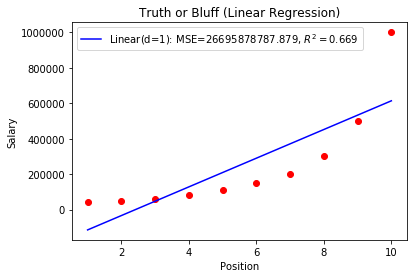

In [4]:
# Visualising the Linear Regression results
plt.scatter(X, y, color='red')
plt.plot(X, 
         lin_reg.predict(X),
         label='Linear(d=1): MSE=%.3f, $R^2=%.3f$'%(linear_MSE,linear_r2),
         color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.legend(loc='upper left')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [5]:
# Fitting Polynomial Regression(degree=2) to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_2_reg = PolynomialFeatures(degree=2)
X_poly = poly_2_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_poly_2_pred = lin_reg_2.predict(poly_2_reg.fit_transform(X))
poly_2_MSE=mean_squared_error(y, y_poly_2_pred)
poly_2_r2=r2_score(y, y_poly_2_pred)


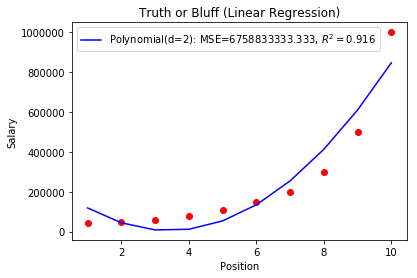

In [6]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, 
         lin_reg_2.predict(poly_2_reg.fit_transform(X)),
         label='Polynomial(d=2): MSE=%.3f, $R^2=%.3f$'%(poly_2_MSE,poly_2_r2),
         color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.legend(loc='upper left')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [7]:
# Fitting Polynomial Regression to the dataset with degree=3
poly_3_reg = PolynomialFeatures(degree=3)
X_poly = poly_3_reg.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y)
y_poly_3_pred = lin_reg_3.predict(poly_3_reg.fit_transform(X))
poly_3_MSE=mean_squared_error(y, y_poly_3_pred)
poly_3_r2=r2_score(y, y_poly_3_pred)

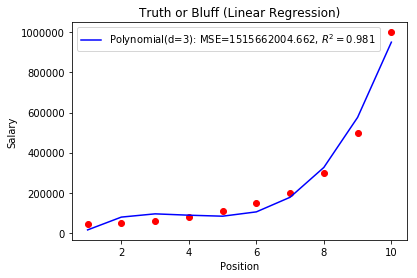

In [8]:
# Visualising the Polynomial Regression results with degree=3
plt.scatter(X, y, color='red')
plt.plot(X, 
         lin_reg_3.predict(poly_3_reg.fit_transform(X)),
         label='Polynomial(d=3): MSE=%.3f, $R^2=%.3f$'%(poly_3_MSE,poly_3_r2),
         color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.legend(loc='upper left')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [9]:
# Fitting Polynomial Regression to the dataset with degree=4
poly_4_reg = PolynomialFeatures(degree=4)
X_poly = poly_4_reg.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly, y)
y_poly_4_pred = lin_reg_4.predict(poly_4_reg.fit_transform(X))
poly_4_MSE=mean_squared_error(y, y_poly_4_pred)
poly_4_r2=r2_score(y, y_poly_4_pred)

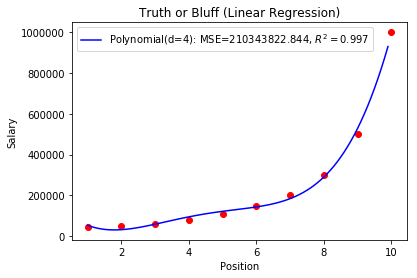

In [10]:
# Visualising the Polynomial Regression results with degree=4
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, 
         lin_reg_4.predict(poly_4_reg.fit_transform(X_grid)),
         label='Polynomial(d=4): MSE=%.3f, $R^2=%.3f$'%(poly_4_MSE,poly_4_r2),
         color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.legend(loc='upper left')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [11]:
poly_4_pred = lin_reg_4.predict(poly_4_reg.fit_transform([[6.5]]))  
print(poly_4_pred)  

[158862.45265153]


In [12]:
# Univariate Polynomial Regression 
  
class PolynomailRegression() :       
    def __init__(self, degree, learning_rate, iterations) :          
        self.degree = degree        
        self.learning_rate = learning_rate          
        self.iterations = iterations           
    # function to tranform X      
    def transform(self, X) :          
        # initialize X_transform          
        X_transform = np.ones((self.m, 1))           
        j = 0    
        for j in range(self.degree + 1) :             
            if j != 0 :                  
                x_pow = np.power( X, j )                  
                # append x_pow to X_transform                   
                X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis = 1)   
        return X_transform         
    # function to normalize X_tranform      
    def normalize(self, X) :         
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis = 0 )) / np.std(X[:, 1:], axis = 0)         
        return X           
    # model training      
    def fit(self, X, Y) :           
        self.X = X       
        self.Y = Y       
        self.m, self.n = self.X.shape      
        # weight initialization      
        self.W = np.zeros(self.degree + 1)           
        # tranform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n          
        X_transform = self.transform(self.X)          
        # normalize X_transform           
        X_normalize = self.normalize(X_transform)                 
        # gradient descent learning     
        for i in range(self.iterations) :             
            h = self.predict( self.X )          
            error = h - self.Y              
            # update weights      
            self.W = self.W - self.learning_rate * (1 / self.m) * np.dot(X_normalize.T, error)           
        return self     
    # predict       
    def predict(self, X) :       
        # tranform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n          
        X_transform = self.transform(X)          
        X_normalize = self.normalize(X_transform)          
        return np.dot(X_transform, self.W)         

In [13]:
# Driver code        
def main() :          
    # Create dataset       
    dataset = pd.read_csv('/home/minhvu/Desktop/Py4DS/Position_Salaries.csv')
    X = dataset.iloc[:, 1:2].values
    y = dataset.iloc[:, 2].values
    # model training     
    model = PolynomailRegression(degree = 2, learning_rate = 0.01, iterations = 500)  
    model.fit(X, y)       
    # Prediction on training set   
    Y_pred = model.predict(X)       
    # Visualization        
    plt.scatter(X, y, color = 'blue')       
    plt.plot(X, Y_pred, color = 'orange' )       
    plt.title('X vs Y')      
    plt.xlabel('X')      
    plt.ylabel('Y')       
    plt.show()

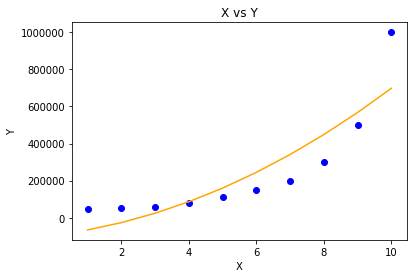

In [14]:
if __name__ == "__main__" :       
    main()